This notebook is basically a scratch pad.  

Goal is to understand [base](#base) and [meds](#meds) data.

Can come back to this as questions arise.

In [ ]:
import pandas as pd
import numpy as np

In [389]:
# handy for looking at uniques
pd.set_option('display.max_colwidth', 200)
f_unique = lambda ds: {'num_unique': ds.nunique(), 'vals_unique': ds.unique()}

# base

In [390]:
_df_base = pd.read_csv('data/meps_base_data.csv', index_col=0)
print len(df_base)
_df_base.head()

61489


,id,panel,pooledWeight,age,sex,race,married,highBPDiagnosed,diabetesDiagnosed,chdDiagnosed,miDiagnosed,anginaDiagnosed,strokeDiagnosed,emphysemaDiagnosed,asthmaDiagnosed,otherHDDiagnosed,heartFailureDiagnosed
1,10007101,15,3603.881236,28,Male,White,MARRIED,Yes,No,No,No,No,No,No,No,No,No
2,10007102,15,2544.550424,25,Female,White,MARRIED,No,No,No,No,No,No,No,Yes,No,No
3,10007103,15,4050.397468,4,Male,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
4,10007104,15,3064.059720,3,Female,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
5,10008101,15,3635.552466,51,Male,Multiple,MARRIED,No,No,No,No,No,No,No,No,No,No


> we care about patient id and "Diagnosed data"

ids and duplicates?

In [391]:
_df_base.id.isnull().any()

False

In [392]:
_df_base.id.is_unique

True

In [393]:
_df_base.set_index('id').duplicated().any()
_df_base.set_index('id').duplicated().mean()

0.0028297744311990762

> yay. unique ids, <1% possible duplicates

cardinality

In [394]:
_df_base.apply(f_unique).apply(pd.Series)

,num_unique,vals_unique
id,61489,"[10007101, 10007102, 10007103, 10007104, 10008101, 10008102, 10008103, 10009101, 10012101, 10012102, 10014101, 10014102, 10014103, 10016101, 10016102, 10016103, 10016104, 10016105, 10016106, 10017..."
panel,4,"[15, 14, 13, 12]"
pooledWeight,60600,"[3603.88123575, 2544.55042425, 4050.39746775, 3064.05971975, 3635.55246625, 4367.81625275, 3342.31650375, 6241.9382795, 9143.332918, 10168.118988, 3392.3308015, 4613.563478, 3513.66099225, 2743.57..."
age,87,"[28, 25, 4, 3, 51, 53, 12, 61, 79, 75, 33, 29, 2, 26, 27, 8, 5, -1, 67, 49, 68, 56, 22, 54, 19, 0, 24, 21, 23, 31, 45, 15, 10, 6, 57, 20, 69, 43, 42, 16, 13, 17, 62, 46, 64, 37, 38, 44, 66, 58, 18..."
sex,2,"[Male, Female]"
race,6,"[White, Multiple, Asian, Black, Native Hawaiian/Pacific Islander, Amer Indian/Alaska Native]"
married,11,"[MARRIED, UNDER 16 - INAPPLICABLE, NEVER MARRIED, INAPPLICABLE, DIVORCED, WIDOWED, DIVORCED IN ROUND, MARRIED IN ROUND, SEPARATED, SEPARATED IN ROUND, WIDOWED IN ROUND]"
highBPDiagnosed,6,"[Yes, No, Inapplicable, DK, not ascertained, Refused]"
diabetesDiagnosed,6,"[No, Inapplicable, Yes, DK, not ascertained, Refused]"
chdDiagnosed,6,"[No, Inapplicable, Yes, DK, not ascertained, Refused]"


> Have to deal diagnosis data. Strange that only heart failure has only yes/no

##### Prep diagnosis data
We want yes, no, or NaN

In [395]:
COLS_DX = _df_base.columns[_df_base.columns.str.endswith('Diagnosed')].tolist()
print COLS_DX

['highBPDiagnosed', 'diabetesDiagnosed', 'chdDiagnosed', 'miDiagnosed', 'anginaDiagnosed', 'strokeDiagnosed', 'emphysemaDiagnosed', 'asthmaDiagnosed', 'otherHDDiagnosed', 'heartFailureDiagnosed']


In [396]:
df_dx = (_df_base
        .loc[:, COLS_DX]
        .replace(['Inapplicable', 'DK', 'Refused', 'not ascertained'], np.nan)
        .replace('Yes', True)
        .replace('No', False)
        )

df_base = _df_base.copy()
df_base.loc[:, COLS_DX] = df_dx

In [403]:
######## move stuff to module once I want to use it elsewhere
from source.helpers import load_base_data, COLS_DX

# (df_base.fillna('') == load_base_data().fillna('')).all().all()
(df_base.fillna('') == load_base_data(minors=True).fillna('')).all().all()

True

### further exploration...

demographics

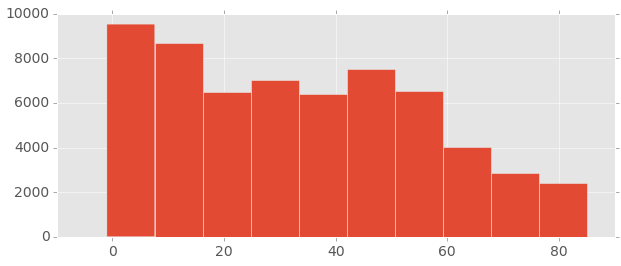

In [58]:
_df_base.age.hist()

> more young people than expected

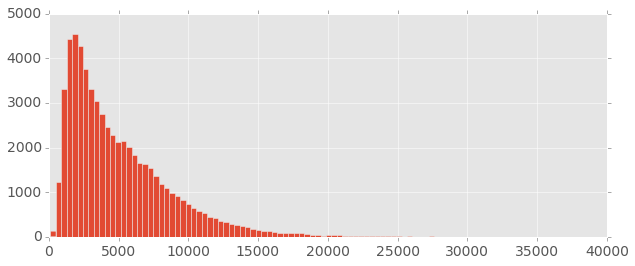

In [59]:
_df_base.pooledWeight.hist(bins=100);

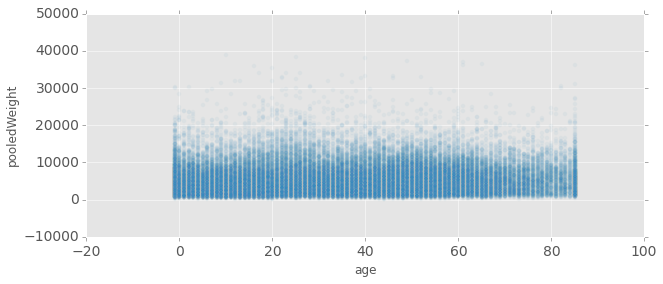

In [60]:
_df_base.plot.scatter('age', 'pooledWeight', alpha=0.05);

> doesn't look like body weight. Hmm

In [61]:
_df_base.panel.unique()

array([15, 14, 13, 12])

> ?

Disease diagnosis

In [62]:
_df_base[COLS_DX].stack().value_counts()

No                 431619
Inapplicable       147195
Yes                 35735
DK                    237
not ascertained        57
Refused                47
dtype: int64

> Why so many "Inapplicable"?

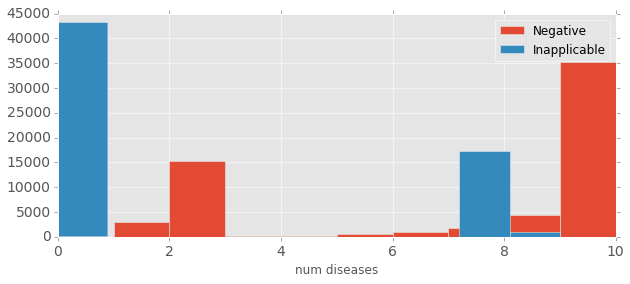

In [63]:
# pattern in diagnosis across all diseases?
# (_df_base[COLS_DX] == 'Yes').sum(axis=1).hist()
(_df_base[COLS_DX] == 'No').sum(axis=1).hist()
(_df_base[COLS_DX] == 'Inapplicable').sum(axis=1).hist()
plt.legend(['Negative', 'Inapplicable'])
plt.xlabel('num diseases');

> 2 populations!

In [64]:
_df_base[((_df_base[COLS_DX] == 'Inapplicable').sum(axis=1) == 8)].head()

,id,panel,pooledWeight,age,sex,race,married,highBPDiagnosed,diabetesDiagnosed,chdDiagnosed,miDiagnosed,anginaDiagnosed,strokeDiagnosed,emphysemaDiagnosed,asthmaDiagnosed,otherHDDiagnosed,heartFailureDiagnosed
3,10007103,15,4050.397468,4,Male,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
4,10007104,15,3064.059720,3,Female,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
7,10008103,15,3342.316504,12,Female,Asian,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
13,10014103,15,3513.660992,2,Male,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
16,10016103,15,3413.110979,8,Female,Multiple,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No


17

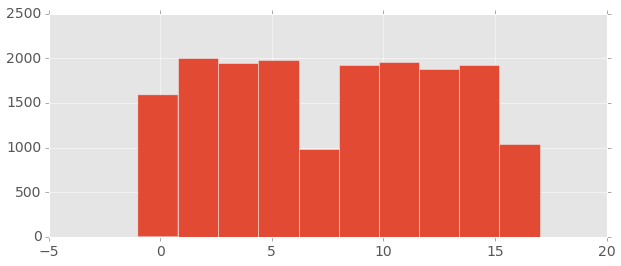

In [65]:
_df_base[((_df_base[COLS_DX] == 'Inapplicable').sum(axis=1) == 8)].age.hist()
_df_base[((_df_base[COLS_DX] == 'Inapplicable').sum(axis=1) == 8)].age.max()

> ah! patients under 18

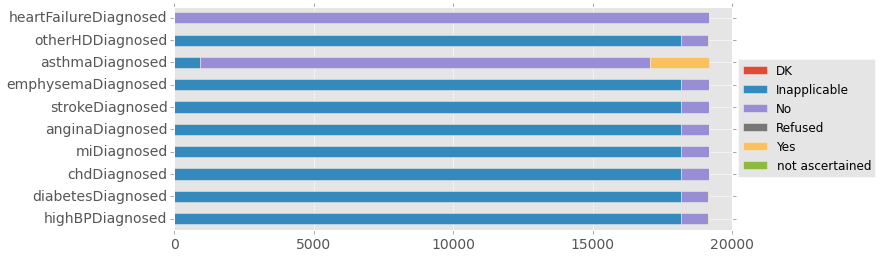

In [66]:
_df_base.loc[_df_base.age < 18, COLS_DX].apply(pd.value_counts).T.plot.barh(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5));

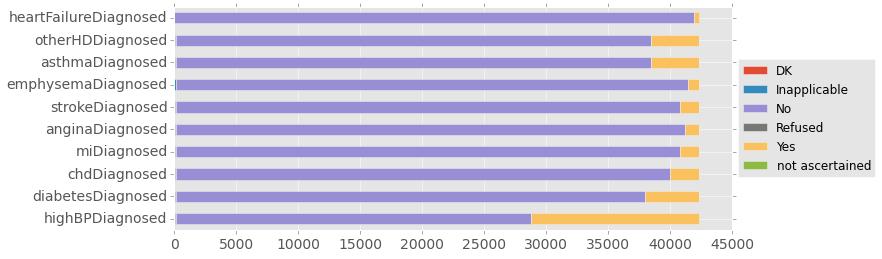

In [67]:
_df_base.loc[_df_base.age >= 18, COLS_DX].apply(pd.value_counts).T.plot.barh(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5));

> prob want to exclude minors unless working with athsma or heart failure

In [74]:
######## update my module
df_base = load_base_data(minors=False)

In [72]:
df_base.age.min()

18

In [73]:
set(df_base[COLS_DX].values.ravel())

{False, True, nan}

> data prep summary
* looks like one row per patient
* could potentially have some duplicates (<1%)
* not sure what `panel` or `pooledWeight` mean
* Threw out diagnoses besides Yes / No
* option to throw out data from minors (lots of "Inapplicable" values)

## meds

In [86]:
_df_meds = pd.read_csv('data/meps_meds.csv', index_col=0)
print len(_df_meds)
_df_meds.head()

1148347


,id,rxStartMonth,rxStartYear,rxName,rxNDC,rxQuantity,rxForm
1,10007104,3,2011,AMOXICILLIN,143988775,75.0,SUSR
2,10007104,3,2011,OTIC EDGE SOLUTION,68032032814,14.0,SOL
3,10008102,3,2011,NASAL DECONGESTANT 0.05% SPRAY,63981056903,15.0,SPR
4,10008102,3,2011,NASAL DECONGESTANT 0.05% SPRAY,63981056903,15.0,SPR
5,10008102,9,2011,DIPHENHYDRAM,603333921,30.0,CAP


> 
* \>20x more meds data than patient data
* looks like duplicates, or multiple prescriptions per drug per patient

patient id?

In [88]:
_df_meds.id.isin(_df_base.id).all()

True

In [89]:
_df_base.id.isin(_df_meds.id).all()

False

In [90]:
_df_base.id.isin(_df_meds.id).mean()

0.67951991413098278

> 
* all patients id meds also in base
* most patients in base also in meds

cardinality

In [322]:
_df_meds.apply(f_unique).apply(pd.Series)

,num_unique,vals_unique
id,41783,"[10007104, 10008102, 10012101, 10012102, 10014102, 10016102, 10016104, 10016105, 10016106, 10017101, 10019101, 10019102, 10021103, 10026101, 10026102, 10030101, 10030102, 10030103, 10030104, 10033..."
rxStartMonth,16,"[3, 9, -1, 11, 5, 6, 8, 10, -8, 1, 4, 2, 12, 7, -9, -7]"
rxStartYear,74,"[2011, 2005, 2003, -8, 2004, 2010, 2008, 1997, 1998, 1999, 2007, 2006, 2009, 1982, 1984, 1996, 2002, 1987, 1995, 2001, 2000, -9, 1990, 1989, 1991, 1992, 1993, 1978, 1986, 1994, -14, 1985, 1980, 19..."
rxName,9218,"[AMOXICILLIN, OTIC EDGE SOLUTION, NASAL DECONGESTANT 0.05% SPRAY, DIPHENHYDRAM, CHLD ALLERGY, COMBIVENT, DIGOXIN, LORAZEPAM, XOPENEX, SIMVASTATIN, HYDROCHLOROT, CARVEDILOL, ZOLPIDEM, MORPHINE SUL,..."
rxNDC,28736,"[143988775, 68032032814, 63981056903, 603333921, 24385037926, 597001314, 115981101, 591024105, 63402051324, 16714068501, 172208380, 591024110, 603385632, 93013501, 16714062202, 60951065270, 681800..."
rxQuantity,606,"[75.0, 14.0, 15.0, 30.0, 100.0, 45.0, 90.0, 270.0, 828.0, 180.0, 60.0, 120.0, 56.0, 6.0, 1.0, 20.0, 10.0, 240.0, 12.0, 150.0, 473.0, 70.0, 34.0, 42.0, 200.0, 50.0, 37.0, 115.0, 38.0, 360.0, 5.0, 1..."
rxForm,328,"[SUSR, SOL, SPR, CAP, LIQD, AERO, TABS, NEBU, TB12, CAPS, PT24, TAB, TBCR, CPDR, CUTTER, SUSP, TBDP, ELIX, LIQ, SUS, AEPB, MISC, CRE, OINT, IN, INJ, TB24, STA, POW, TA, SOLN, Eye drops, TBEC, DEVI..."


> ~3x more drug NDC codes than drug names!
* I thought it would be the other way around
* Without knowledge of now NDC codes work, probably best just to use names

patient-prescriptions

In [436]:
print _df_meds[['id', 'rxName']].duplicated().mean()
_df_meds[_df_meds[['id', 'rxName']].duplicated()].head()

0.788705852848


,id,rxStartMonth,rxStartYear,rxName,rxNDC,rxQuantity,rxForm
4,10008102,3,2011,NASAL DECONGESTANT 0.05% SPRAY,63981056903,15.0,SPR
7,10008102,9,2011,CHLD ALLERGY,24385037926,100.0,LIQD
8,10008102,9,2011,CHLD ALLERGY,24385037926,100.0,LIQD
9,10008102,9,2011,CHLD ALLERGY,24385037926,100.0,LIQD
10,10008102,9,2011,CHLD ALLERGY,24385037926,100.0,LIQD


> Most prescriptions are duplicates.  
We only care about unique drugs per patient

drug names

In [602]:
names = _df_meds.rxName.str.strip().str.upper().sort_values().unique().tolist()
len(names)

9215

In [603]:
names

['(ARMOUR) THYROID (1GR)',
 '-9',
 '1 ANTI-INFECTIVES',
 '1.5 INCH 27 GAUGE NEEDLE',
 '1/2ML TB SYR',
 '10',
 '105 MISCELLANEOUS AGENTS',
 '113 GENITOURINARY TRACT AGENTS',
 '115 NUTRITIONAL PRODUCTS',
 '122 RESPIRATORY AGENTS',
 '133 TOPICAL AGENTS',
 '1CC TB SYRNG27GX1/2"',
 '1ML TB SYRNG',
 '20 ANTINEOPLASTICS',
 '218 ALTERNATIVE MEDICINES',
 '242 PSYCHOTHERAPEUTIC AGENTS',
 '254 IMMUNOLOGIC AGENTS',
 '28 BIOLOGICALS',
 '28G LANCET',
 '3 ML LUER LOCK SYRINGE',
 '30G 0.5" INSULIN SYRINGE',
 '358 METABOLIC AGENTS',
 '3ML LL SYRNG',
 '3ML SYRINGE',
 '40 CARDIOVASCULAR AGENTS',
 '5 MM MINI PEN NEEDLES',
 '57 CENTRAL NERVOUS SYSTEM AGENTS',
 '5MM MINI PEN NEEDLES',
 '81 COAGULATION MODIFIERS',
 '87 GASTROINTESTINAL AGENTS',
 '8MZ TMP',
 '97 HORMONES',
 '97 HORMONES/HORMONE MODIFIERS',
 'A&D',
 'A-COF DH (AF,SF,DYE-FREE,GRAPE)',
 'A/B OTIC',
 'A/B/H/R',
 'AA BATTERIES',
 'ABILIFY',
 'ABREVA',
 'ABSORBASE',
 'ABSORBASE TOP',
 'ABX SUPPORT',
 'ACANYA',
 'ACARBOSE',
 'ACCOLATE',
 'ACCU CHECK

> Yikes. Lots of duplicate drugs due to slight variations in name.  
NDCs have higher cardidality, so won't help now

##### prep medication data
* try to disambiguate drug names
* ignore duplicate prescriptions per patient

dumb disambiguation: get 1st token longer than 3 characters, ignoring numbers

In [604]:
rxNickname = (_df_meds
                .rxName
                .str.upper()
                .str.extract('([A-Z]{4,})', expand=False)
                .str.strip()
                )

print rxNickname.nunique()

3505


In [674]:
rxNickname.name = 'rxNickname'

In [690]:
rxNickname.isnull().mean()

0.0038612022324262616

In [677]:
# look at mapping
_df = _df_meds.groupby(rxNickname).rxName.apply(f_unique).unstack()

In [691]:
##### run many times to inspect
i = np.random.randint(0, len(_df)-10)
_df.iloc[i:i+10]

,num_unique,vals_unique
rxNickname,,
GANI,4,"[GANI-TUSS DM, GANI-TUSS NR, GANI-TUSS-DM NR, GANI-TUSS-DM NR (AF,SF,RASPBERRY)]"
GANIRELIX,2,"[GANIRELIX AC, GANIRELIX ACETATE]"
GARDASIL,2,"[GARDASIL, GARDASIL (10 X 0.5ML,SDV,PF)]"
GARLIC,1,[GARLIC]
GASTROINTESTINAL,1,[87 GASTROINTESTINAL AGENTS]
GATIFLOXACIN,1,[GATIFLOXACIN]
GAUZE,1,[GAUZE PAD]
GAVILYTE,3,"[GAVILYTE-C, GAVILYTE-G, GAVILYTE-N]"
GELCLAIR,1,"[GELCLAIR (SINGLE-USE,15X15ML)]"


In [698]:
_df.reset_index().rxNickname.isnull().any()

False

> looks pretty good
* \>2x fewer names
* fails on abbreviations and drug combos (Nulls get dropped!)

Keep renamed meds (and source NDCs) and prescription counts for each patient

In [639]:
def _keep(df):
    return pd.Series({
            'numPrescriptions': len(df),
            'originalNDCs': df['rxNDC'].unique()
        })

In [672]:
# _df_meds.iloc[:300].groupby(['id', rxNickname]).apply(_keep)
df_meds = _df_meds.groupby(['id', rxNickname]).apply(_keep).reset_index()

In [676]:
print len(df_meds)
df_meds.head()

219111


,id,rxName,NDCs,numPrescriptions
0,10007101,ATENOLOL,"[68382002210, 51079068463]",4
1,10007101,AZITHROMYCIN,[59762314001],1
2,10007102,CARISOPRODOL,[603258228],1
3,10007102,HYDROCO,[406036005],1
4,10007102,TREXIMET,[173075000],2


> \>5x fewer rows than original

In [671]:
###### add to module
from source.helpers import load_meds_data

_df = load_meds_data().fillna('')[['rxName', 'numPrescriptions']]
(df_meds.fillna('')[['rxName', 'numPrescriptions']] == _df).all().all()

True

> data prep summary
* looks like 1 row per prescription
* lots of ambigous drug names and NDCs, even per-patient
* drug nickname: 1st word in drug name
* collapsed data into unique drug nicknames per patient
    * keep original NDCs
    * count number of prescriptions per drug per patient in case useful